# Q1

Linear Regression: Yield = 0.0068 * Temp + 2.3063
Quadratic Regression: Yield = 7.9605 * Temp^2 + -0.1537 * Temp + 0.0011
Linear Regression MSE: 0.1327, RMSE: 0.3643
Polynomial Regression MSE: 2999928958.5260, RMSE: 54771.6072


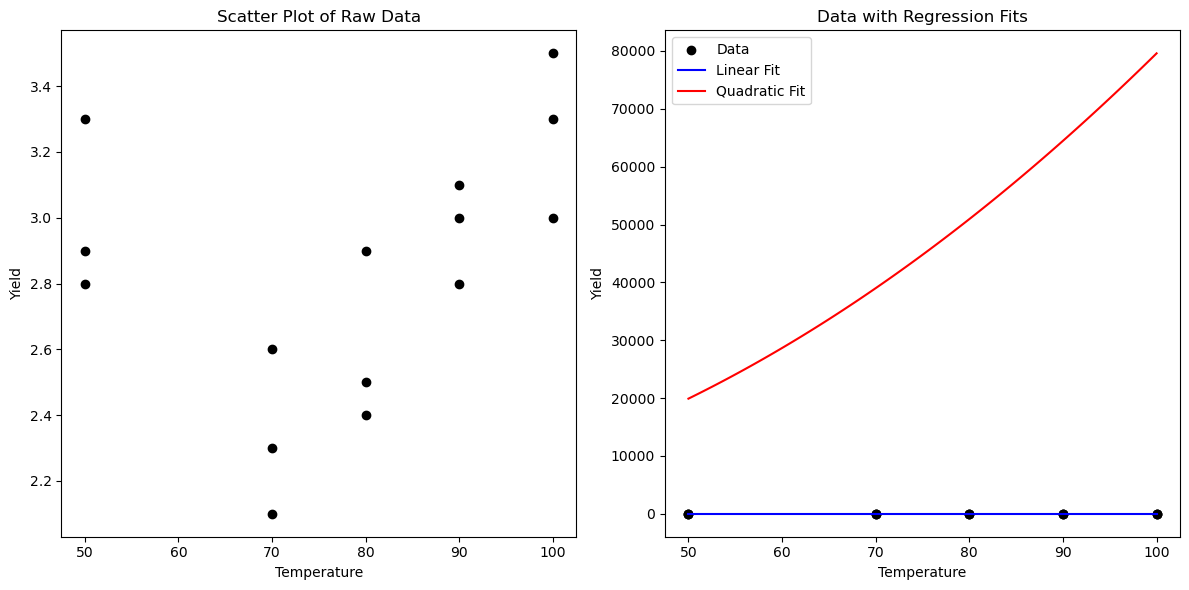

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('temp_data.csv')
x = data['Temp'].values
y = data['Yield'].values

# Linear Regression
def linear_regression(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    beta, alpha = np.linalg.lstsq(X, y, rcond=None)[0]
    return beta, alpha

# Polynomial Regression (Quadratic)
def polynomial_regression(x, y, degree=2):
    X = np.vstack([x**i for i in range(degree + 1)]).T
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    return coeffs

# Compute Mean Squared Error and Root Mean Squared Error
def compute_errors(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return mse, rmse

# Linear regression
beta, alpha = linear_regression(x, y)
print(f"Linear Regression: Yield = {beta:.4f} * Temp + {alpha:.4f}")

# Polynomial regression (quadratic)
coeffs = polynomial_regression(x, y, degree=2)
print(f"Quadratic Regression: Yield = {coeffs[0]:.4f} * Temp^2 + {coeffs[1]:.4f} * Temp + {coeffs[2]:.4f}")

# Predictions
x_fit = np.linspace(min(x), max(x), 100)
y_linear_fit = beta * x_fit + alpha
y_poly_fit = coeffs[0] * x_fit**2 + coeffs[1] * x_fit + coeffs[2]

# Errors
y_linear_pred = beta * x + alpha
y_poly_pred = coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

mse_linear, rmse_linear = compute_errors(y, y_linear_pred)
mse_poly, rmse_poly = compute_errors(y, y_poly_pred)

print(f"Linear Regression MSE: {mse_linear:.4f}, RMSE: {rmse_linear:.4f}")
print(f"Polynomial Regression MSE: {mse_poly:.4f}, RMSE: {rmse_poly:.4f}")

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='black', label='Data')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Scatter Plot of Raw Data')

# Linear and Quadratic Fits
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='black', label='Data')
plt.plot(x_fit, y_linear_fit, color='blue', label='Linear Fit')
plt.plot(x_fit, y_poly_fit, color='red', label='Quadratic Fit')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Data with Regression Fits')
plt.legend()

plt.tight_layout()
plt.show()


# Q2

Fitted model: Infarc = -0.135 + 0.613*Area + -0.243*X2 + -0.066*X3
MSE: 0.017
RMSE: 0.130


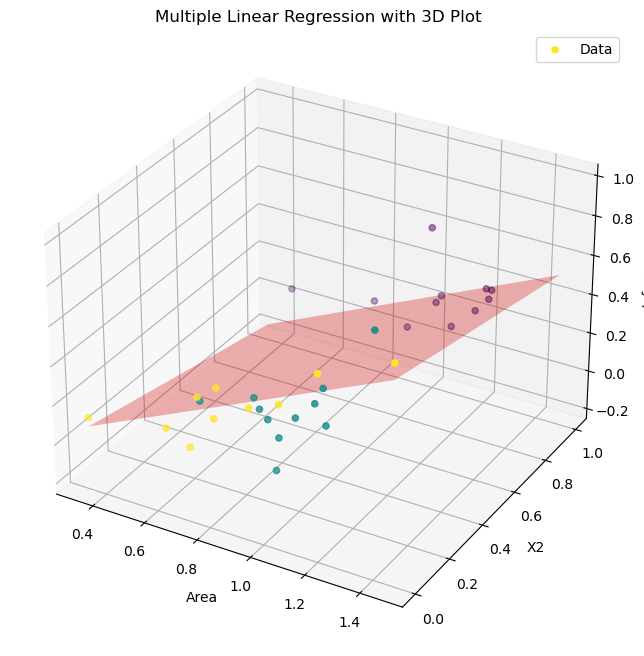

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
data = pd.read_csv('rabbit_data.csv')

# Prepare the data
X = data[['Area', 'X2', 'X3']].values
y = data['Infarc'].values

# Add a constant column for the intercept
X = np.c_[np.ones(X.shape[0]), X]

# Compute the coefficients using the Normal Equation: β = (X^T X)^(-1) X^T y
X_transpose = X.T
beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

# Extract coefficients
beta0, beta1, beta2, beta3 = beta

# Print the fitted model
print(f'Fitted model: Infarc = {beta0:.3f} + {beta1:.3f}*Area + {beta2:.3f}*X2 + {beta3:.3f}*X3')

# Predicting values
y_pred = X @ beta

# Compute residuals
residuals = y - y_pred

# Compute MSE and RMSE
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

# Plot the data and the regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['Area'], data['X2'], data['Infarc'], c=data['Group'], cmap='viridis', label='Data')

# Create grid for the regression plane
area_range = np.linspace(data['Area'].min(), data['Area'].max(), 10)
x2_range = np.linspace(data['X2'].min(), data['X2'].max(), 10)
area_grid, x2_grid = np.meshgrid(area_range, x2_range)
x3_grid = np.zeros_like(area_grid)  # X3 values are not used in the plot

# Compute the predicted Infarc values
infarc_grid = beta0 + beta1 * area_grid + beta2 * x2_grid + beta3 * x3_grid

# Plot regression plane
ax.plot_surface(area_grid, x2_grid, infarc_grid, color='r', alpha=0.3)

# Set labels
ax.set_xlabel('Area')
ax.set_ylabel('X2')
ax.set_zlabel('Infarc')

# Add legend
plt.legend()

plt.title('Multiple Linear Regression with 3D Plot')
plt.show()
